In [1]:
import seaborn as sns
import pandas as pd

iris_df = sns.load_dataset('iris')

In [2]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='species', ylabel='petal_length'>

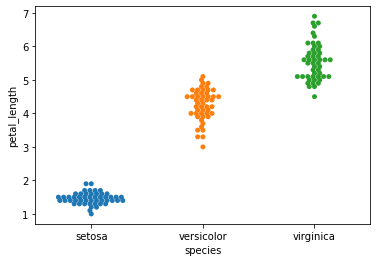

In [4]:
sns.swarmplot(x='species', y='petal_length', data=iris_df)

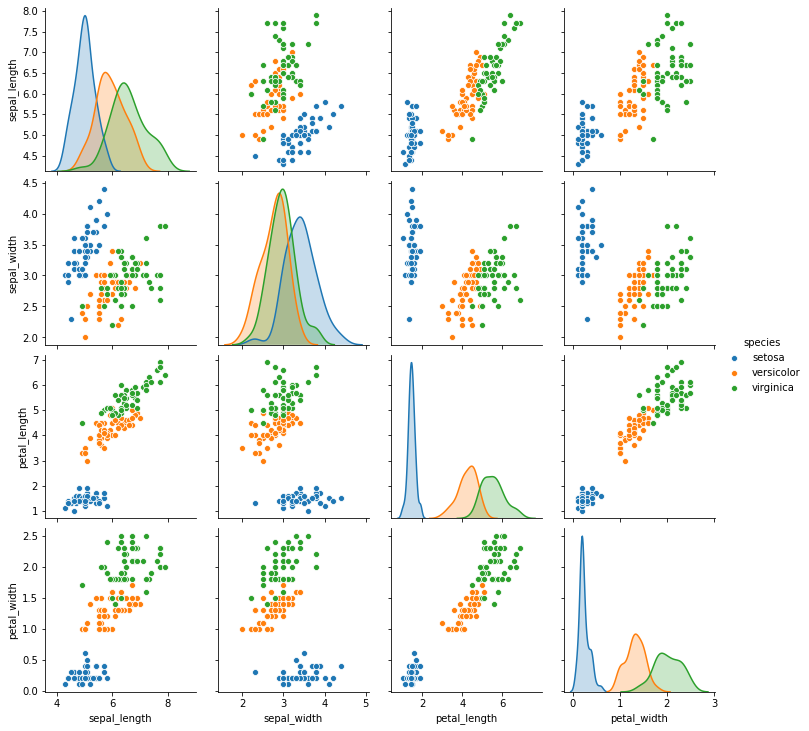

In [5]:
sns.pairplot(iris_df, hue='species')

In [6]:
from sklearn import tree
import mlflow
import mlflow.sklearn
import shutil

model_name = 'iris'

mlflow.set_tracking_uri('databricks')
mlflow.set_experiment('/Experiments/iris')

with mlflow.start_run() as run:
  iris_data = iris_df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
  iris_target = iris_df.loc[:, ['species']]

  sk_model = tree.DecisionTreeClassifier()
  sk_model = sk_model.fit(iris_data, iris_target)
  
  mlflow.log_param('criterion', sk_model.criterion)
  mlflow.log_param('splitter', sk_model.splitter)
  
  # log model
  mlflow.sklearn.log_model(iris_df, registered_model_name=model_name, artifact_path='model')
  mlflow.sklearn.save_model(sk_model, run.info.run_id, serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_CLOUDPICKLE)

  # compare output
  runs_df = mlflow.search_runs(run.info.experiment_id)

  shutil.rmtree(run.info.run_id, ignore_errors=True)
  shutil.rmtree('mlruns', ignore_errors=True)

Registered model 'iris' already exists. Creating a new version of this model...
Created version '17' of model 'iris'.


In [7]:
runs_df

/opt/miniconda3/envs/datalabs/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,run_id,experiment_id,status,artifact_uri,start_time,end_time,params.splitter,params.criterion,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.git.commit
0,9191813353524aad9ba4be579138205b,3086471488133212,RUNNING,dbfs:/databricks/mlflow-tracking/3086471488133...,2020-09-29 17:27:54.363000+00:00,NaT,best,gini,ipykernel_launcher,"[{""run_id"":""9191813353524aad9ba4be579138205b"",...",simon.dale@bjss.com,LOCAL,None
1,f6b595e8ae9842798a347e35b9e4e956,3086471488133212,FINISHED,dbfs:/databricks/mlflow-tracking/3086471488133...,2020-09-29 14:23:53.773000+00:00,2020-09-29 14:23:59.528000+00:00,best,gini,ipykernel_launcher,"[{""run_id"":""f6b595e8ae9842798a347e35b9e4e956"",...",simon.dale@bjss.com,LOCAL,None
2,b2816acdd36e42cab506116b02596fa8,3086471488133212,FINISHED,dbfs:/databricks/mlflow-tracking/3086471488133...,2020-09-29 14:23:02.485000+00:00,2020-09-29 14:23:09.087000+00:00,best,gini,ipykernel_launcher,"[{""run_id"":""b2816acdd36e42cab506116b02596fa8"",...",simon.dale@bjss.com,LOCAL,None
3,478f4c1e4f1b4f49a8e5a8027dc13a70,3086471488133212,FINISHED,dbfs:/databricks/mlflow-tracking/3086471488133...,2020-09-29 13:28:56.837000+00:00,2020-09-29 13:29:02.164000+00:00,best,gini,driver/training.py,"[{""run_id"":""478f4c1e4f1b4f49a8e5a8027dc13a70"",...",simon.dale@bjss.com,LOCAL,8feafcf6e628b8a7d3775ee2ac5844e1d600b08c
4,42423d2d20214e37b079b78d5f581ce7,3086471488133212,FINISHED,dbfs:/databricks/mlflow-tracking/3086471488133...,2020-09-29 13:24:03.099000+00:00,2020-09-29 13:24:09.592000+00:00,best,gini,driver/training.py,"[{""run_id"":""42423d2d20214e37b079b78d5f581ce7"",...",simon.dale@bjss.com,LOCAL,8feafcf6e628b8a7d3775ee2ac5844e1d600b08c
